<h1 style='color:Red' align='center'>Predicting Home Prices in Banglore</h1>

<h2 style='color:blue'>Introduction</h2>

In this presentation, we'll be examining a dataset focused on house prices in Bangalore. With over 13,000 entries and 9 columns, the dataset offers insights into various property attributes including area type, availability, location, size, and pricing. While exploring the dataset, we've identified missing values that need addressing. 

Our aim is to utilize this data to construct a regression model that accurately predicts house prices, offering valuable insights for buyers, sellers, and real estate professionals. Let's begin by understanding the dataset and the process of building our predictive model.

<h2 style='color:blue'>Dataset Overview</h2>

- **Area_Type:** The type of area of the property.
- **Availability:** Earliest time to move in the property, availability for possession.
- **Location:** Locality or area in the city.
- **Size:** Property type (e.g., 3BHK, 4BHK).
- **Society:** Indicates whether the property is part of a society or not.
- **Total Sqft area:** Area of the property in square feet.
- **Bathroom Nos:** Number of bathrooms in that particular property.
- **Balcony:** Number of balconies.
- **Price:** Price of the property (target column).

This overview provides a summary of the columns present in the dataset and their respective descriptions.


<h2 style='color:blue'>Importing necessary libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# As the file contains characters outside standard ASCII range
df = pd.read_csv('Bengaluru_House_Data.csv', encoding='latin-1')

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


<h2 style='color:blue'>Pre-Processing</h2>

In [4]:
# Dropping the columns which has no signification in building the model
df1 = df.drop(['area_type','availability', 'society'], axis=1)
df1.head(2)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,$39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,$120.00


In [5]:
# fropping the observations having null value
df1['balcony'] = df1['balcony'].fillna(df1['balcony'].median())
df2 = df1.dropna()
df2.head(2)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,$39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,$120.00


In [6]:
# extracting the number of bedroom from 'size'
df2['no_of_bedrooms'] = df['size'].str[0]
df3 = df2.drop('size', axis=1)
df3.head(2)

,location,total_sqft,bath,balcony,price,no_of_bedrooms
0,Electronic City Phase II,1056,2.0,1.0,$39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,$120.00,4


In [7]:
# converting the datatype to integer
df3['no_of_bedrooms'] = df3['no_of_bedrooms'].astype(int) 

In [8]:
# Extracting the price alone
import re
df3["price"] = df3["price"].apply(lambda x: re.sub(r'[^\d.]+', '', x))

In [9]:
# converting the datatype to float
df3['price'] = df3['price'].astype(float)

In [10]:
df3.head(2)

,location,total_sqft,bath,balcony,price,no_of_bedrooms
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4


In [11]:
# Extracting the numerical values alone
df3['total_sqft'] = df3['total_sqft'].apply(lambda x: int(re.search(r'\b\d+\b', x).group()) 
                                            if re.search(r'\b\d+\b', x) else None)

In [12]:
# # converting the datatype to float
df3['total_sqft'] = df3['total_sqft'].astype(float)
# df3 = df3.dropna(subset=['total_sqft'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   total_sqft      13216 non-null  float64
 2   bath            13246 non-null  float64
 3   balcony         13246 non-null  float64
 4   price           13246 non-null  float64
 5   no_of_bedrooms  13246 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 672.6+ KB


In [13]:
df4 = df3.copy()
df4.head()

,location,total_sqft,bath,balcony,price,no_of_bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


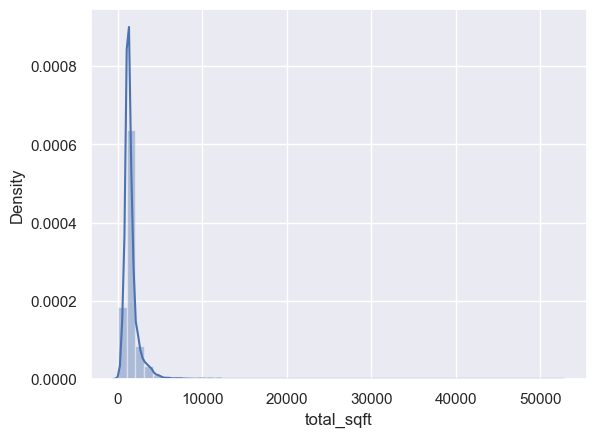

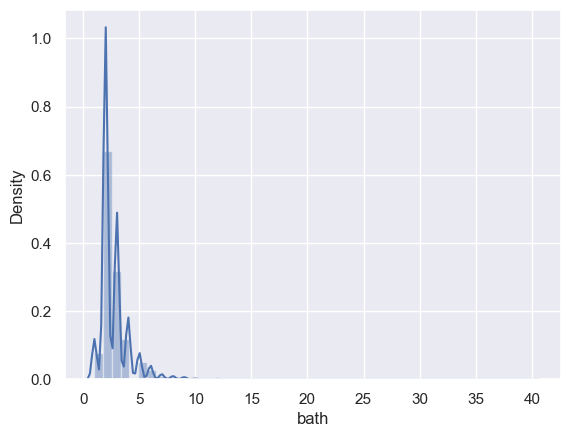

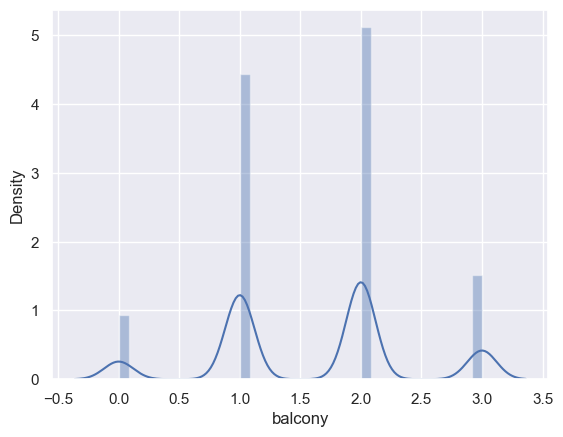

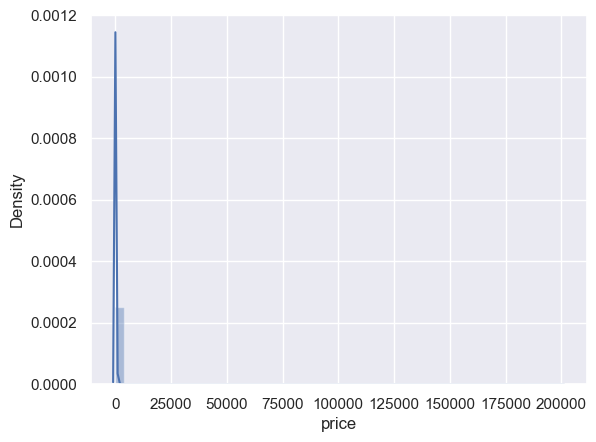

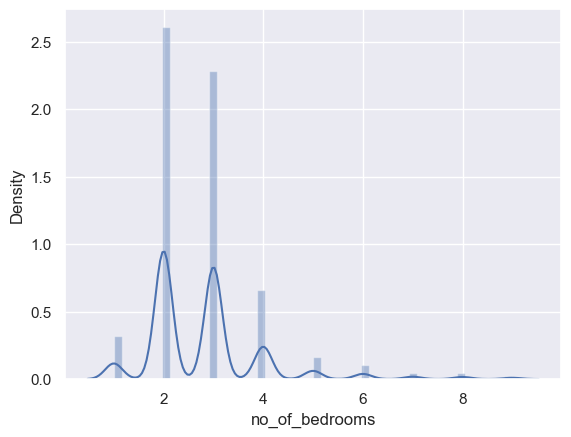

In [14]:
def distplots(col):
    sns.distplot(df4[col])
    plt.show()
    
for i in df4.columns[df4.dtypes!='object']:
    distplots(i)

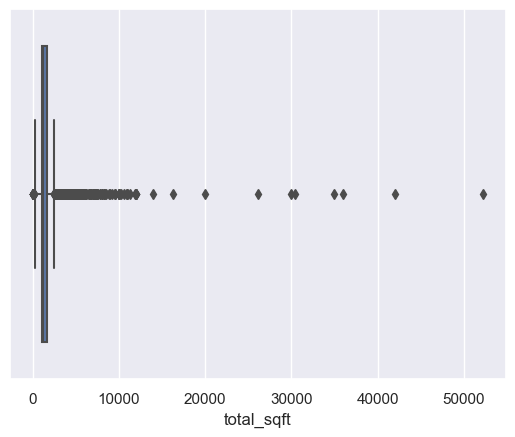

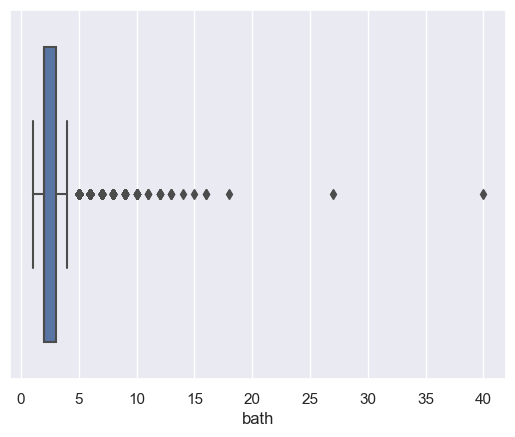

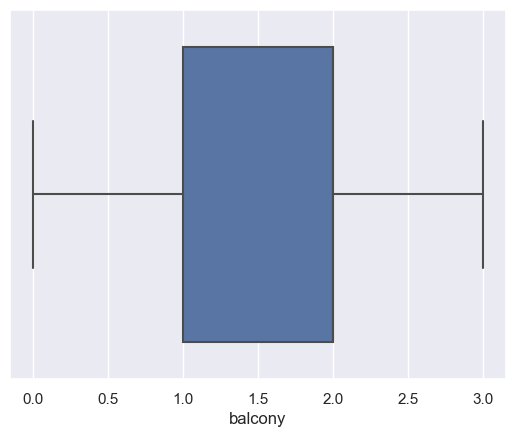

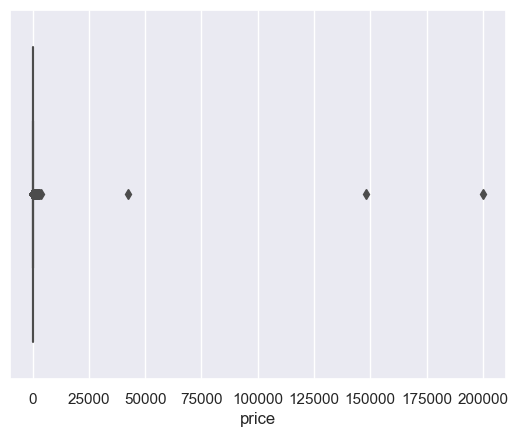

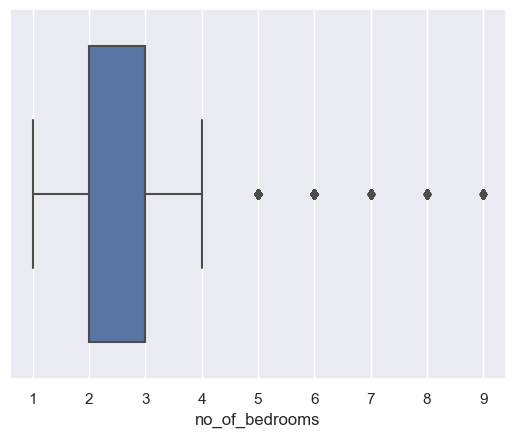

In [15]:
def boxplots(col):
    sns.boxplot(df4[col])
    plt.show()
    
for i in list(df4.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

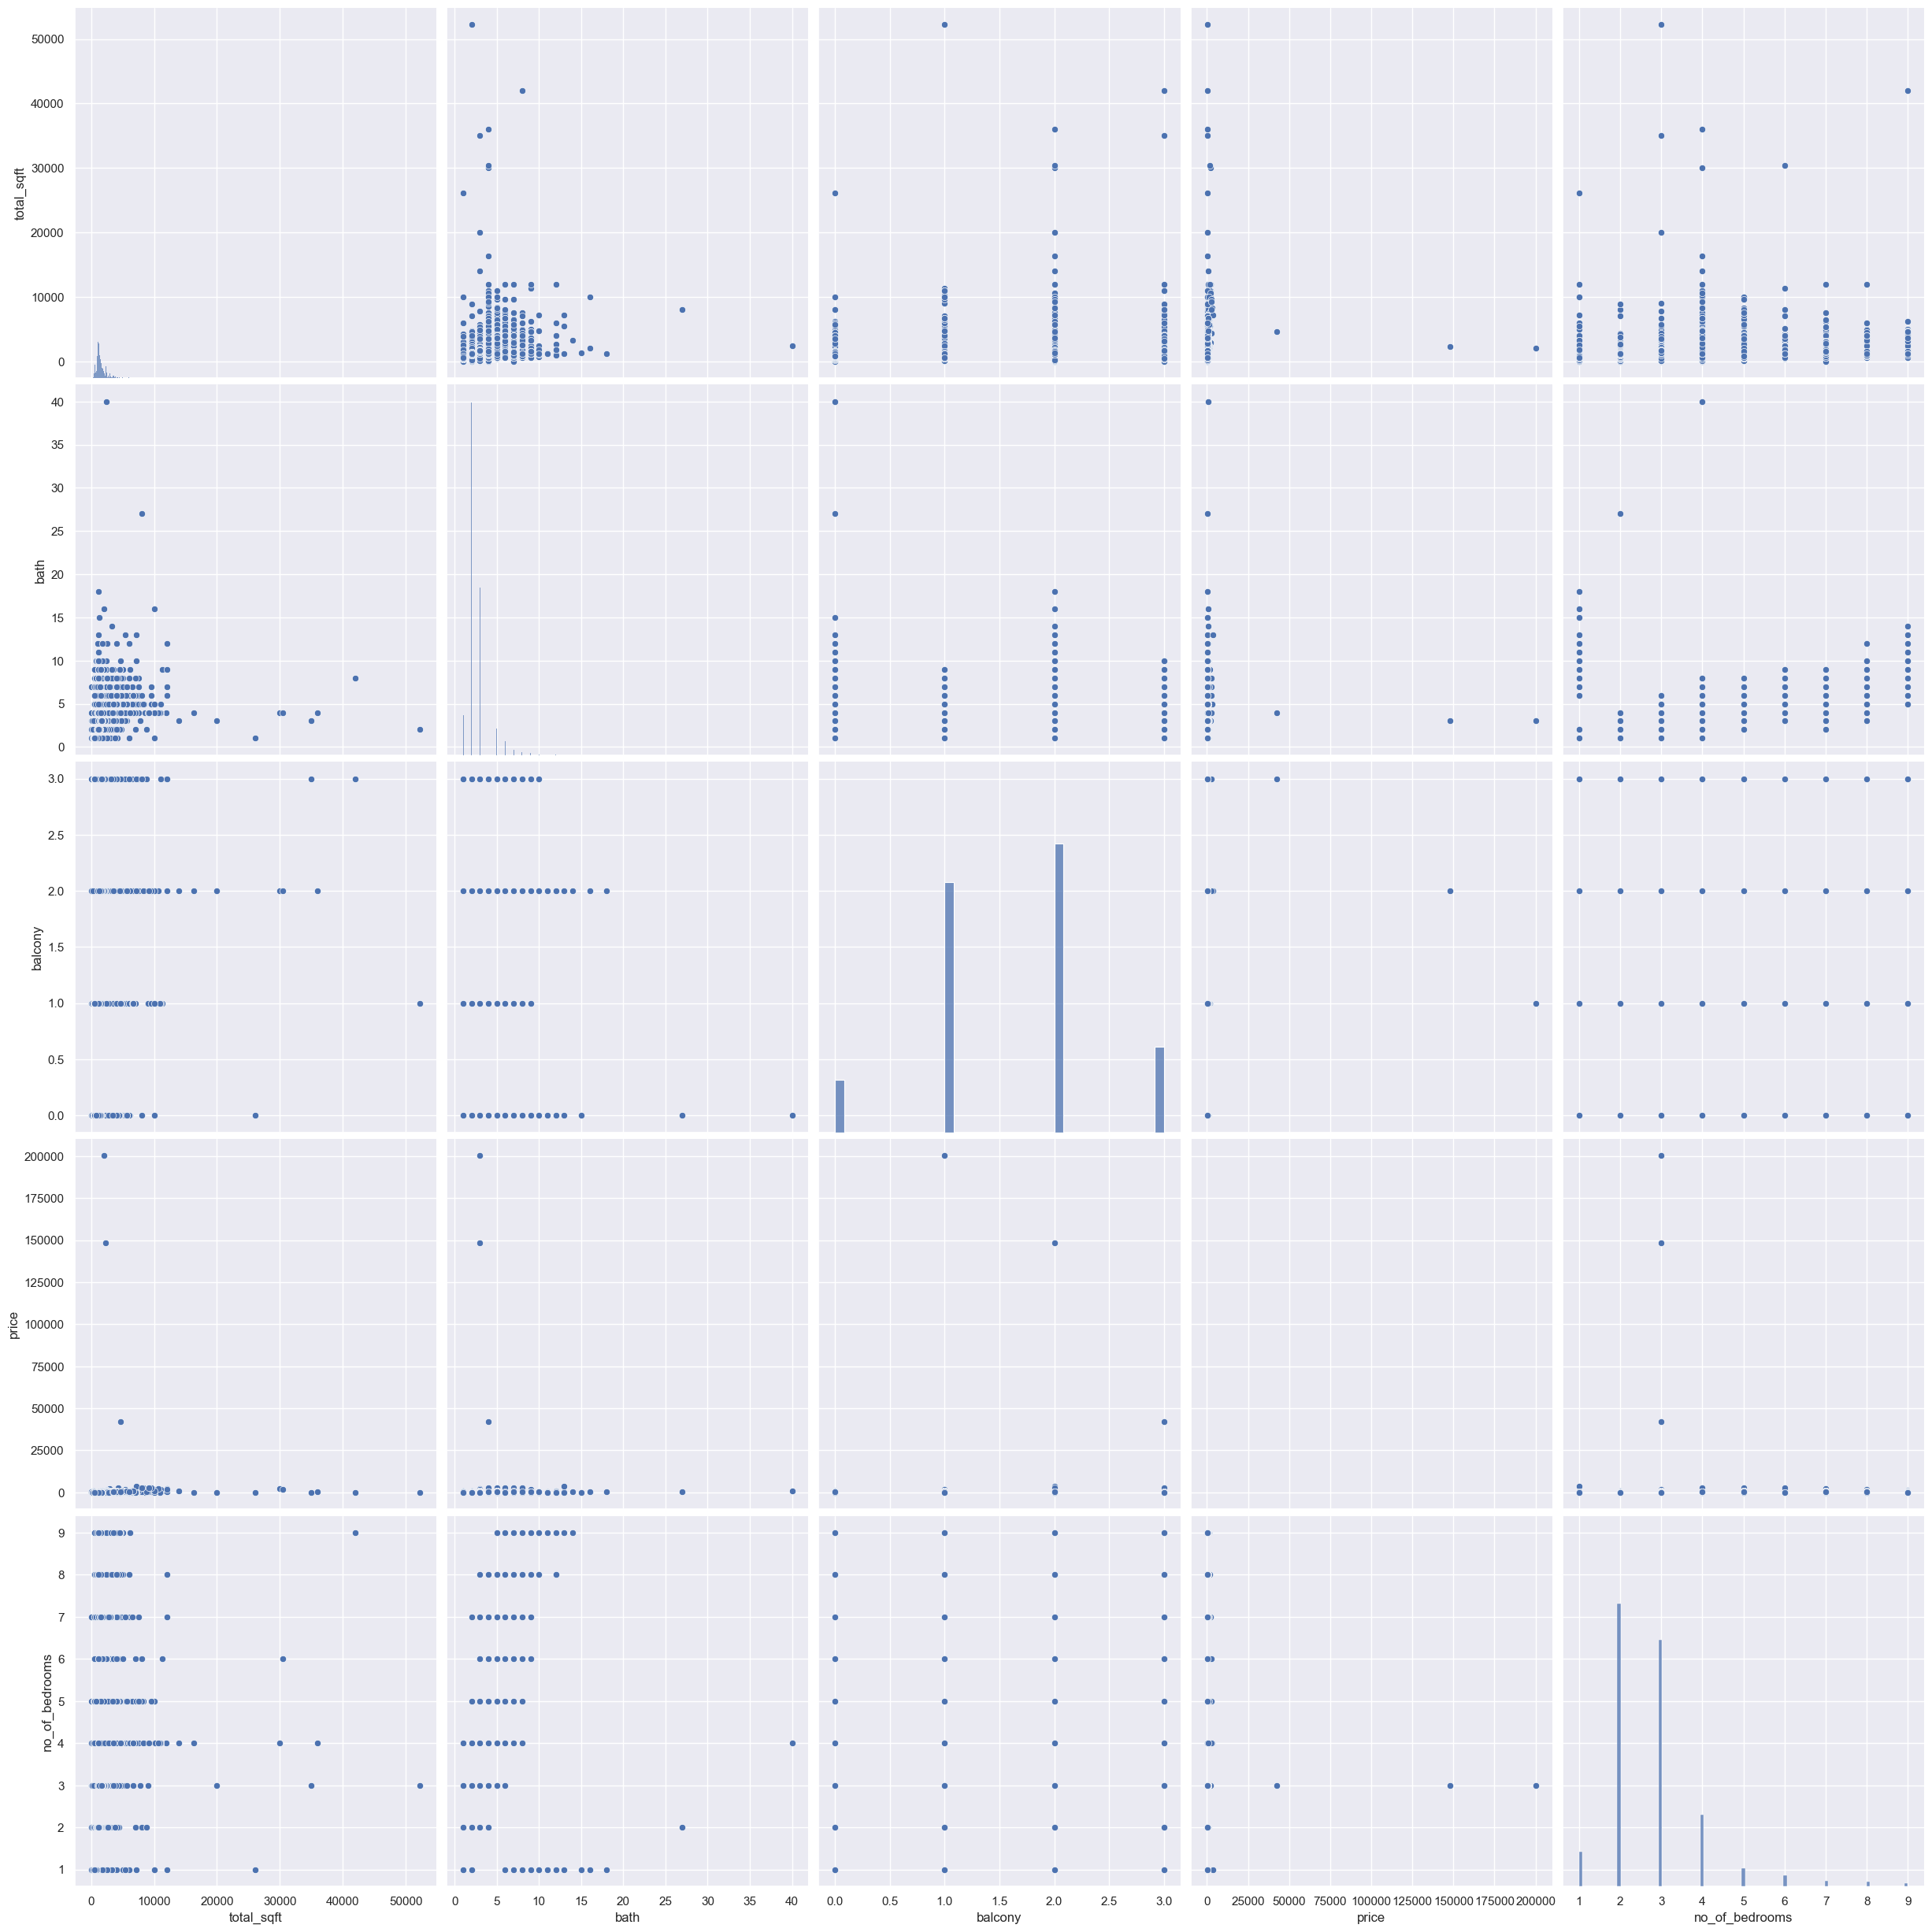

In [16]:
# Bivariate Analysis
sns.pairplot(df4, size=5, kind='scatter')

<h2 style='color:blue'>Feature Engineering</h2>

In [17]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13216.0,1552.065148,1236.779462,1.0,1100.0,1270.0,1670.0,52272.0
bath,13246.0,2.692586,1.341506,1.0,2.0,2.0,3.0,40.0
balcony,13246.0,1.601163,0.804759,0.0,1.0,2.0,2.0,3.0
price,13246.0,141.780529,2198.702809,8.0,50.0,72.0,120.0,200250.0
no_of_bedrooms,13246.0,2.778046,1.170077,1.0,2.0,3.0,3.0,9.0


In [18]:
# taking less than 10 no. of repeated locations as 'others'
df4['location'] = df4['location'].apply(lambda x: 'others' if df4['location'].value_counts()[x]<10
                                       else x)

In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   total_sqft      13216 non-null  float64
 2   bath            13246 non-null  float64
 3   balcony         13246 non-null  float64
 4   price           13246 non-null  float64
 5   no_of_bedrooms  13246 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 1.2+ MB


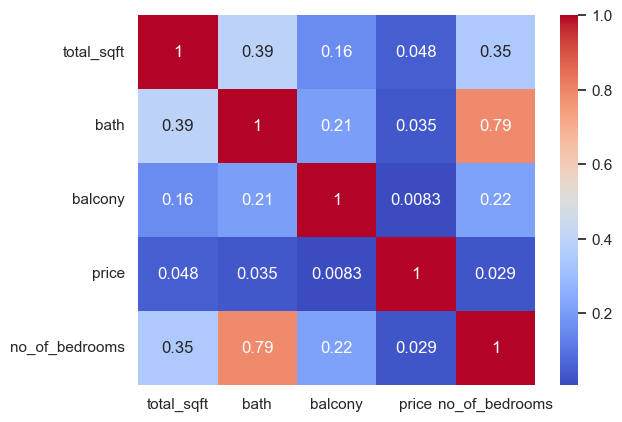

In [21]:
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
df5=df4.copy()

In [23]:
df5.head(2)

,location,total_sqft,bath,balcony,price,no_of_bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [24]:
# Taking 'price_per_sqft' as new variable for convenience 
df5['price_per_sqft']=round((df5['price']/df5['total_sqft'])*100000,2)

In [25]:
# Removing the outliers in price_per_sqft
def rmv_outlierBy_median(x):
    out_df = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        median = np.median(subdf.price_per_sqft)
        MAD = np.median(np.abs(subdf.price_per_sqft - median))
        scalling_factor = 1.4826
        threshold = 3.5 * scalling_factor * MAD
        reduced_df = subdf[np.abs(subdf.price_per_sqft - median) < threshold]
        out_df = pd.concat([out_df, reduced_df], ignore_index=True)
    return out_df

df6 = rmv_outlierBy_median(df5)

In [26]:
# Removing the outliers in no_of_bedrooms
def remove_bhk_outliers(x):
    out_df = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        median = np.median(subdf.no_of_bedrooms)
        mad = np.median(np.abs(subdf.no_of_bedrooms - median))
        scalling_factor = 1.4826
        threshold = 3.5 * scalling_factor * mad
        reduced_df = subdf[np.abs(subdf.no_of_bedrooms - median) < threshold]
        out_df = pd.concat([out_df, reduced_df], ignore_index=True)
    return out_df

df7 = remove_bhk_outliers(df6)

In [27]:
df7.shape

(3732, 7)

In [28]:
# using One Hot Encoder
df8 = pd.get_dummies(df7)
df8.shape

(3732, 111)

In [29]:
# splitting dependant and independant variable
x = df8.drop('price', axis=1)
y=df8['price']

In [30]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [31]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y,test_size=0.25, random_state=5)

<h2 style='color:blue'>Model Building</h2>

### Linear Regressor

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

from sklearn.metrics import r2_score
print("Training Accuracy: " , r2_score(y_train, lr_pred_train))
print()
print("Testing Accuracy: ", r2_score(y_test, lr_pred_test))

Training Accuracy:  0.8204219582629314

Testing Accuracy:  0.7176522761165356


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=50,n_jobs=-1,oob_score=True,random_state=5)
RF.fit(x_train,y_train)

rf_pred_train=RF.predict(x_train)
rf_pred_test=RF.predict(x_test)

print("Training Accuracy: " , r2_score(y_train, rf_pred_train))
print()
print("Testing Accuracy: ", r2_score(y_test, rf_pred_test))

Training Accuracy:  0.9918550957091669

Testing Accuracy:  0.9314455966913457


### XGBoost

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor(booster='gbtree',n_estimators=100, max_depth=5, random_state=5)
xgb.fit(x_train, y_train)

xgb_pred_train = xgb.predict(x_train)
xgb_pred_test = xgb.predict(x_test)

print("Training Accuracy: " , r2_score(y_train, xgb_pred_train))
print()
print("Testing Accuracy: ", r2_score(y_test, xgb_pred_test))

Training Accuracy:  0.999686663486394

Testing Accuracy:  0.9137482735878945


### Grid Search Cross Validation

In [35]:
from sklearn.model_selection import GridSearchCV
param={'max_depth':[5,10,15,20,30],'min_samples_leaf':[10,15,20,50,100]}
gs=GridSearchCV(estimator=xgb,param_grid=param,cv=10,n_jobs=-1,scoring='r2')
gs.fit(x_train,y_train)
gs.best_estimator_

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, min_samples_leaf=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, x_scaler, y, cv=10, scoring='r2')

print("R-squared scores for each fold:", scores)

print("Mean R-squared score:", scores.mean())


R-squared scores for each fold: [0.97894689 0.71468578 0.99339884 0.98678649 0.85137593 0.98400484
 0.90903827 0.99005775 0.86343126 0.99532923]
Mean R-squared score: 0.9267055256772208


### Mean Absolute Error (MAE)

In [37]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, xgb_pred_test))

MAE:  6.2875505202069535


### Mean Absolute Percent Error (MAPE)

In [38]:
print("MAE: ", metrics.mean_absolute_error(y_test, xgb_pred_test)/100)

MAE:  0.06287550520206954


### Mean Squared Error (MSE)

In [39]:
print("MAE: ", metrics.mean_squared_error(y_test, xgb_pred_test))

MAE:  1955.6283856371701


### Root Mean Squared Error (RMSE)

In [40]:
print("MAE: ", np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test)))

MAE:  44.222487329832205


In [43]:
# Accuracy Values
model_names = ["Linear Regression", "Random Forest", "XGBoost Regressor"]
accuracy_data = {'Train_Accuracies': [0.732714031193823, 0.9962616437797394, 0.9995032354352665],
                 'Test_Accuracies': [ 0.7324155249859567, 0.9314455966913457, 0.9137482735878945]}

In [44]:
accuracy_df = pd.DataFrame(accuracy_data, index= model_names)
accuracy_df

,Train_Accuracies,Test_Accuracies
Linear Regression,0.732714,0.732416
Random Forest,0.996262,0.931446
XGBoost Regressor,0.999503,0.913748


<h2 style='color:blue'>Conclusion: </h2>

**The comparison of different models highlights the importance of model selection in achieving accurate predictions.**

**While Linear Regression provides a baseline understanding, more advanced models like Random Forest and XGBoost offer significant improvements in predictive performance.**

**The choice between Random Forest and XGBoost depends on the trade-off between accuracy and computational complexity, with Random Forest being more computationally efficient and XGBoost providing slightly better accuracy.**
